# Importar

In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [2]:
PROJECT_ROOT = Path.cwd().parent
sys.path.append(str(PROJECT_ROOT))

In [3]:
# Importar funciones personalizadas
from functions.functions import age_range, sort_age_range, sort_schooling

# Leer datos

In [4]:

DATA_PATH_INPUT = PROJECT_ROOT / 'data' / 'processed' / 'preprocessing.csv'

In [5]:
# Importar datos desde data\processed

df = pd.read_csv(DATA_PATH_INPUT)

In [6]:
df.head()

,encuesta,edad,sexo,escolaridad,procedimiento,e1,e2,e3,e4,e5,...,d13,d14,d15,d16,d17,d18,d19,d20,d21,d22
0,1,45,Femenino,Secundaria,Calificación accidente de trabajo,7,6,6,7,5,...,-1,0,-1,-1,0,0,0,0,-2,0
1,2,44,Masculino,Preparatoria,Dictamen Incapacidad Permanente Parcial,6,6,6,6,6,...,0,0,0,0,0,0,0,0,0,0
2,3,49,Femenino,Secundaria,Dictamen de Invalidez,7,7,7,7,7,...,2,3,3,2,2,2,2,2,2,2
3,4,28,Masculino,Preparatoria,Calificación accidente de trabajo,5,4,6,7,7,...,0,0,0,0,0,0,1,1,0,0
4,5,31,Masculino,Secundaria,Calificación accidente de trabajo,7,5,6,7,7,...,0,0,0,0,0,0,0,0,0,0


## Crear columna adicional _rango_edad_

Se creó la columna _RangoEdad_ con la finalidad de agrupar a los pacientes con base en la década que actualmente están viviendo y poder realizar un análisis más profundo de cada grupo.

In [7]:
# Uso de .apply() para crear una columna categórica por rango de edad

df['rango_edad'] = df['edad'].apply(age_range)

Los valores de la columna _RangoEdad_ corresponden a datos categóricos semánticos, es decir que siguen un orden, cronológico en este caso. Por lo cual se modificó la columna para convertirla al tipo _categorical_ ordenada de forma cronológica. Para obtener el orden adecuado y planificando del tipo de dataset necesario para gráficar en Power BI en el orden deseado se crea una columna auxiliar que indicó el orden cronólogico correcto llamada _OrdenRangoEdad_.

## Crear columna adicional _orden_rango_edad_

In [8]:
df['orden_rango_edad'] = df['rango_edad'].apply(sort_age_range)

In [9]:
# Obtener el orden correcto para rango_edad en un array

sort_ar = df.sort_values('orden_rango_edad')['rango_edad'].unique()
print('El orden de la categoría es:', sort_ar)

El orden de la categoría es: ['10s' '20s' '30s' '40s' '50s' '60s']


In [10]:
# Convertir la columna rango_edad a categorical con orden definido

df['rango_edad'] = pd.Categorical(df['rango_edad'], categories=sort_ar, ordered=True)
print('El tipo de dato de la columna rango_edad es:', df.dtypes['rango_edad'])

El tipo de dato de la columna rango_edad es: category


## Crear columna adicional _orden_escolaridad_

In [11]:
df['orden_escolaridad'] = df['escolaridad'].apply(sort_schooling)

In [12]:
# Obtener el orden correcto para  Escolaridad en un array

sort_s = df.sort_values('orden_escolaridad')['escolaridad'].unique()
print('El orden de la categoría es:', sort_s)

El orden de la categoría es: ['Analfabeta' 'Primaria' 'Secundaria' 'Preparatoria' 'Licenciatura'
 'Maestría']


In [13]:
# Convertir la columna Escolaridad a categorical con orden definido

df['escolaridad'] = pd.Categorical(df['escolaridad'], categories=sort_s, ordered=True)
print('El tipo de dato de la columna Escolaridad es:', df.dtypes['escolaridad'])

El tipo de dato de la columna Escolaridad es: category


In [14]:
# Comprobación de la adición de la columnas creadas

df.head()

,encuesta,edad,sexo,escolaridad,procedimiento,e1,e2,e3,e4,e5,...,d16,d17,d18,d19,d20,d21,d22,rango_edad,orden_rango_edad,orden_escolaridad
0,1,45,Femenino,Secundaria,Calificación accidente de trabajo,7,6,6,7,5,...,-1,0,0,0,0,-2,0,40s,4,3
1,2,44,Masculino,Preparatoria,Dictamen Incapacidad Permanente Parcial,6,6,6,6,6,...,0,0,0,0,0,0,0,40s,4,4
2,3,49,Femenino,Secundaria,Dictamen de Invalidez,7,7,7,7,7,...,2,2,2,2,2,2,2,40s,4,3
3,4,28,Masculino,Preparatoria,Calificación accidente de trabajo,5,4,6,7,7,...,0,0,0,1,1,0,0,20s,2,4
4,5,31,Masculino,Secundaria,Calificación accidente de trabajo,7,5,6,7,7,...,0,0,0,0,0,0,0,30s,3,3


## ¿En qué rango de edad se encuentran los pacientes encuestados?

In [15]:
# Definir paleta de colores para el tono de ambos sexos

custom_palette = {'Femenino' : '#F06292', 'Masculino' : '#60A6FA'}

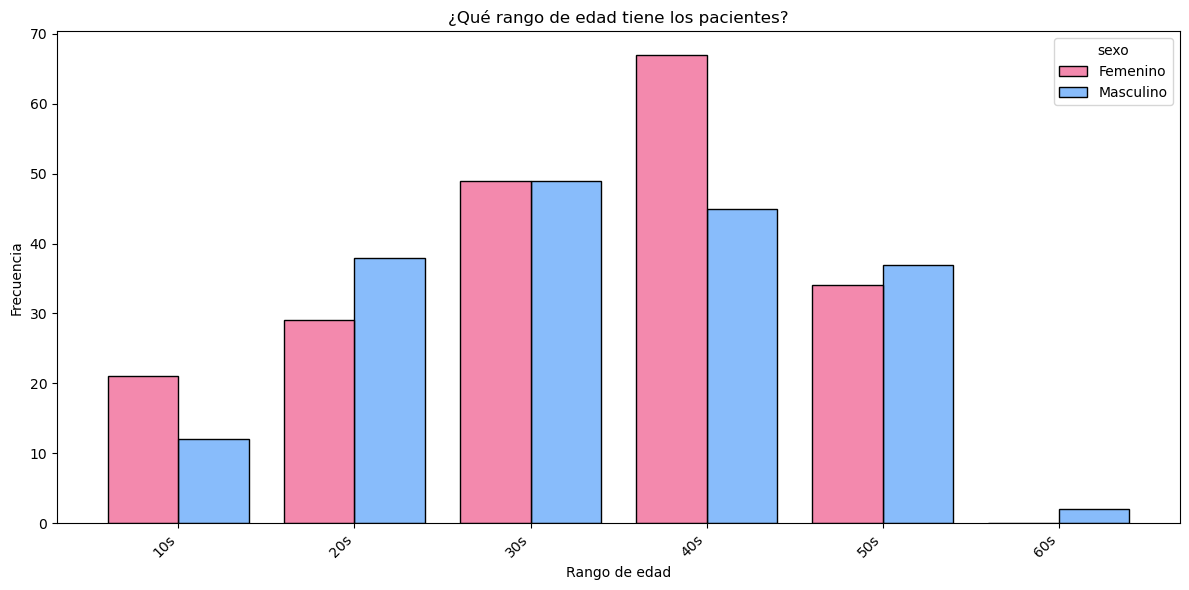

In [16]:
# Crear gráfico por rango de edad

plt.figure(figsize=(12,6))
sns.histplot(data=df, x='rango_edad', hue='sexo', palette=custom_palette, multiple='dodge', shrink=0.8)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Rango de edad')
plt.ylabel('Frecuencia')
plt.title('¿Qué rango de edad tiene los pacientes?')
plt.tight_layout()
plt.show()

- El rango de edad más común de los pacientes femeninos  en orden descendente fue:
40s > 30s > 50s > 20s > 10s
- El rango de edad más común de los pacientes masculinos en orden descendente fue:
30s > 40s > 20s > 50s > 10s > 60s

## ¿Qué procedimiento es el más solicitado por rango de edad?

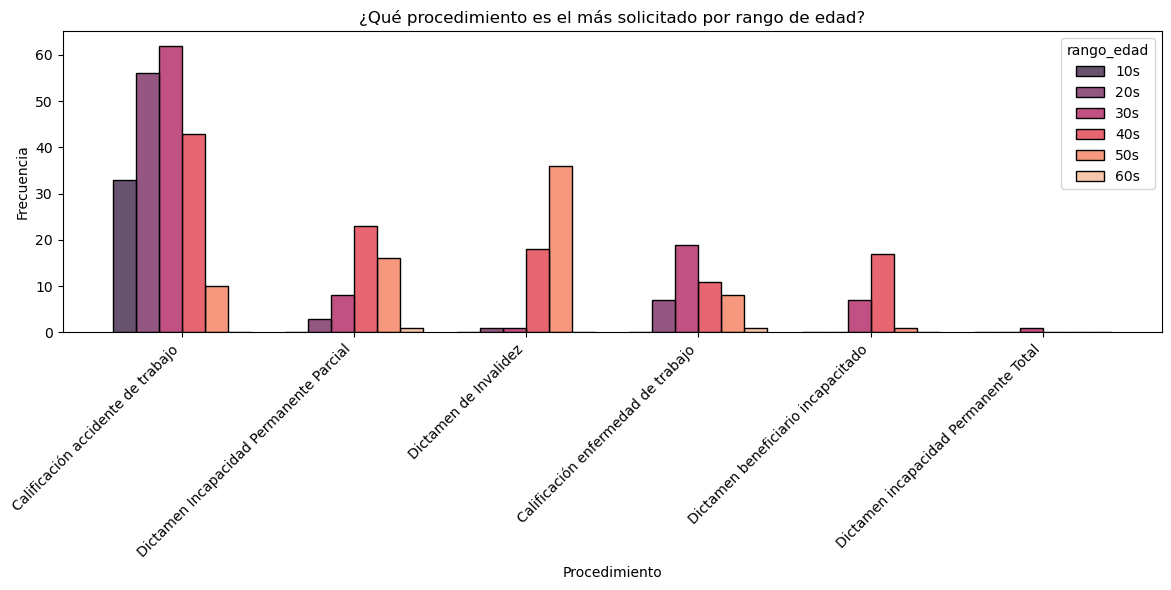

In [17]:
# Crear gráfico procedimiento vs rango de edad

plt.figure(figsize=(12,6))
sns.histplot(data=df, x='procedimiento', hue='rango_edad', palette='rocket', multiple='dodge', shrink=0.8)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Procedimiento')
plt.ylabel('Frecuencia')
plt.title('¿Qué procedimiento es el más solicitado por rango de edad?')
plt.tight_layout()
plt.show()

Se observó que los pacientes cuyos rangos de edad fueron 10s, 20s, 30s y 40s acudieron principalmente a procedimientos para calificar accidentes de trabajo mientas que los pacientes con rangos de edad de 50s acudieron principalmente por procedimientos de dictamenes de invalidez.

## ¿Qué procedimiento es el más solicitado por escolaridad?

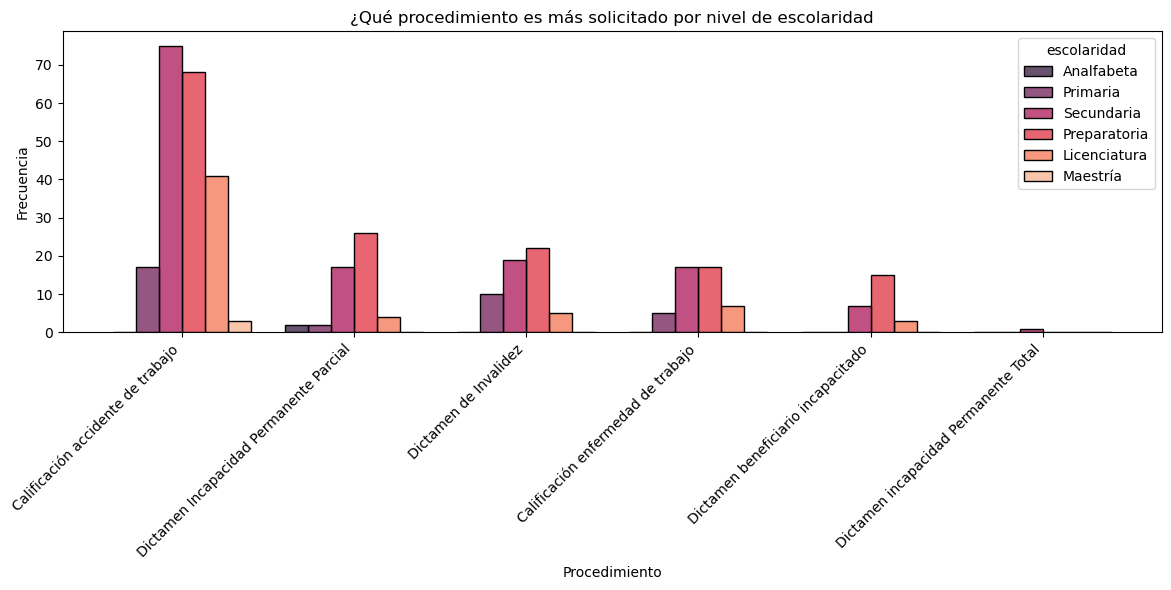

In [18]:
# Crear gráfico procedimiento vs escolaridad

plt.figure(figsize=(12,6))
sns.histplot(data=df, x='procedimiento', hue='escolaridad', palette='rocket', multiple='dodge', shrink=0.8)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Procedimiento')
plt.ylabel('Frecuencia')
plt.title('¿Qué procedimiento es más solicitado por nivel de escolaridad')
plt.tight_layout()
plt.show()


Se observó que el procedimiento más solicitado es la calificación por accidente de trabajo para todos los niveles de escolaridad.

# Guardar datos

In [19]:
DATA_PATH_OUTPUT = PROJECT_ROOT / 'data' / 'processed' / 'df_sql.csv'

In [20]:
df_sql = df.copy()
df_sql.to_csv(DATA_PATH_OUTPUT, index=False)